<a href="https://colab.research.google.com/github/oluwasayo01/digits-classifier/blob/main/Oluwasayo_Akinkunmi_mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Handwritten Digits Image Classification by Oluwasayo Akinkunmi


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
np.random.seed(2020)

In [ ]:
epochs = 20
batch_size = 128
verbose = 1
nb_classes = 10
optimizer = RMSprop(learning_rate=0.002)
hidden_layers = 3
validation_split = 0.2
hidden_1 = 300
hidden_2 = 500
hidden_3 = 100

In [ ]:
zeros = tf.zeros(10).numpy()
zeros

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [ ]:
X_train.shape

(60000, 28, 28)

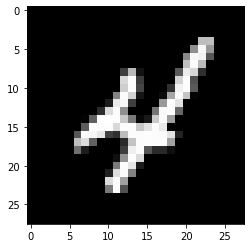

In [ ]:
plt.imshow(X_train[9], cmap='gray')

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]**2).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]**2).astype('float32')

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
X_train[0].shape

(784,)

In [ ]:
X_train /= 255
X_test /= 255

In [ ]:
y_train.astype('float32')
y_test.astype('float32')

array([7., 2., 1., ..., 4., 5., 6.], dtype=float32)

In [ ]:
arr = []

In [ ]:
def cat_to_num(cat):
  num = np.argwhere(cat == 1)[0][0]
  return num

In [ ]:
arr = np.array([0, 0, 0, 1, 0, 0, 0])
cat_to_num(arr)

3

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, nb_classes)

In [ ]:
%%time
model = Sequential()
model.add(Dense(hidden_1, input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(hidden_2))
model.add(Activation('relu'))
model.add(Dense(hidden_3))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=verbose, validation_split=validation_split )
score = model.evaluate(X_test, y_test, verbose=verbose)

print("Test Score: {}".format(score[0]))
print("Test accuracy: {}".format(score[1]))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
activation (Activation)      (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               150500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               50100     
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1

In [ ]:
cat_to_num(y_test[0])

7

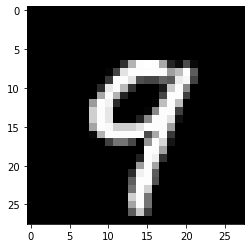

In [ ]:
plt.imshow(X_test[12].reshape(-1, 28), cmap='gray')

In [ ]:
prediction = model.predict(X_test)[12]

In [ ]:
np.argwhere(prediction == np.max(prediction))[0][0]

9